# Bias-Variance Trade-off

En este _notebook_ vamos a ver de forma gráfica el _trade-off_ entre **Bias** y **Variance**. Para esto, vamos a graficar tres _dataset_ que siguen la misma distribución, más un error. Luego vamos a hacer tres modelos que hacen _underfit_ de los datos y tres modelos que hacen _overfit_ y analizaremos lo que pasa en cada caso.

## Creando los datos

Para crear los datos vamos a subir que siguen la distribución $y = x^2 + \epsilon$. Para esto vamos a crear tres _datasets_ con esta distribución y los vamos a graficar. En cada caso, los errores van a distribuir normal.

In [1]:
import numpy as np
import pandas as pd

NUM_ELEMENTS = 20

X = np.linspace(-2, 2, NUM_ELEMENTS)
y1 = X**2 + np.random.normal(0, 1, NUM_ELEMENTS)
y2 = X**2 + np.random.normal(0, 1, NUM_ELEMENTS)
y3 = X**2 + np.random.normal(0, 1, NUM_ELEMENTS)

df = pd.DataFrame(
    {
        "X": X,
        "y1": y1,
        "y2": y2,
        "y3": y3,
        "X^2": X**2
    }
)

df

,X,y1,y2,y3,X^2
0,-2.000000,2.849148,4.178984,5.239693,4.000000
1,-1.789474,3.417740,2.474551,2.928627,3.202216
2,-1.578947,2.233237,2.105289,1.979242,2.493075
3,-1.368421,3.415172,1.400955,2.897184,1.872576
4,-1.157895,-0.164201,0.229363,1.354390,1.340720
5,-0.947368,1.218842,0.735289,-0.709737,0.897507
6,-0.736842,0.598079,0.925916,1.023884,0.542936
7,-0.526316,0.666356,1.732910,-0.385133,0.277008
8,-0.315789,2.216573,-0.053033,-0.201802,0.099723
9,-0.105263,0.983846,-0.667622,-0.723115,0.011080


Ahora vamos a graficar los datos junto a su distribución intrínseca.

Text(0, 0.5, 'y')

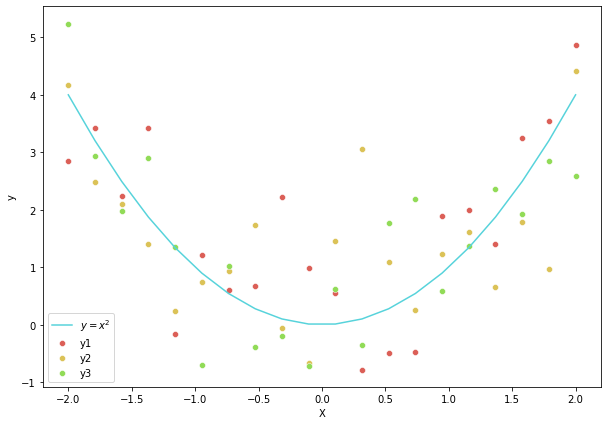

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
palette = sns.color_palette("hls", 8)

sns.scatterplot(data=df, x="X", y="y1", color=palette[0], label="y1")
sns.scatterplot(data=df, x="X", y="y2", color=palette[1], label="y2")
sns.scatterplot(data=df, x="X", y="y3", color=palette[2], label="y3")
sns.lineplot(data=df, x="X", y="X^2", color=palette[4], label="$y=x^2$")

plt.xlabel("X")
plt.ylabel("y")

## Entrenando un modelo de alto sesgo y poca varianza

Ahora vamos a fitear cada sub-dataset con una regresión lineal. Como veremos más adelante, este es un modelo de alto sesgo pero baja varianza.

Text(0, 0.5, 'y')

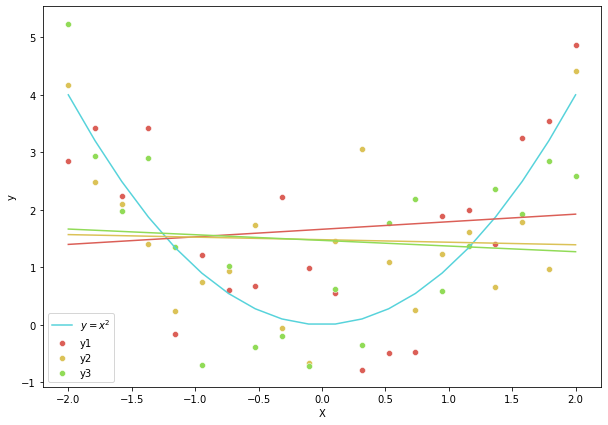

In [6]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X.reshape(-1, 1), y1)
y1_pred = linear_regression.predict(X.reshape(-1, 1))

linear_regression.fit(X.reshape(-1, 1), y2)
y2_pred = linear_regression.predict(X.reshape(-1, 1))

linear_regression.fit(X.reshape(-1, 1), y3)
y3_pred = linear_regression.predict(X.reshape(-1, 1))

plt.figure(figsize=(10, 7))
palette = sns.color_palette("hls", 8)

df2 = pd.DataFrame(
    {
        "X": X,
        "y1_pred": y1_pred,
        "y2_pred": y2_pred,
        "y3_pred": y3_pred
    }
)

sns.scatterplot(data=df, x="X", y="y1", color=palette[0], label="y1")
sns.scatterplot(data=df, x="X", y="y2", color=palette[1], label="y2")
sns.scatterplot(data=df, x="X", y="y3", color=palette[2], label="y3")
sns.lineplot(data=df, x="X", y="X^2", color=palette[4], label="$y=x^2$")

# Plot predictions
sns.lineplot(data=df2, x="X", y="y1_pred", color=palette[0])
sns.lineplot(data=df2, x="X", y="y2_pred", color=palette[1])
sns.lineplot(data=df2, x="X", y="y3_pred", color=palette[2])

plt.xlabel("X")
plt.ylabel("y")

Aquí podemos notar que la regresión lineal es un modelo de **alto sesgo** para estos datos. Si nos paramos en cualquier valor de $X$, en general va a pasar que el promedio de las predicciones va a estar lejos de la distribución real $y = x^2$. Sin embargo, la regresión lineal **tiene poca varianza**, ya que si nos paramos en cualquier $X$ y promediamos el valor de la predicción, la varianza de las predicciones respecto al promedio va a ser poca.

## Entrenando un modelo de bajo sesgo y alta varianza

Ahora supongamos que entrenamos un modelo que pasa exactamente por cada punto. Vamos a visualizar esto a continuación. (Ojo, no estamos entrenando realmente, sino que solo estamos visualizando con Seaborn).

Text(0, 0.5, 'y')

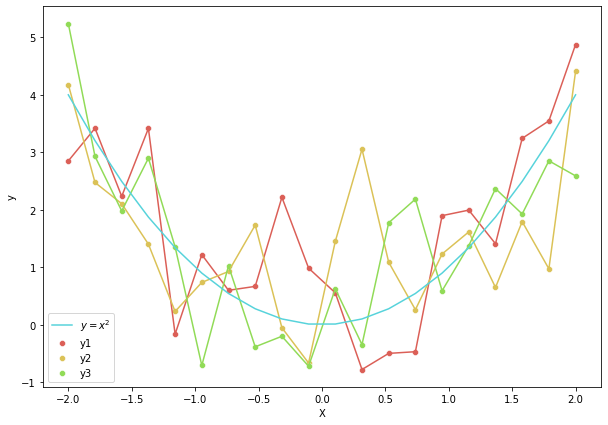

In [17]:
plt.figure(figsize=(10, 7))
palette = sns.color_palette("hls", 8)

# Points
sns.scatterplot(data=df, x="X", y="y1", color=palette[0], label="y1")
sns.scatterplot(data=df, x="X", y="y2", color=palette[1], label="y2")
sns.scatterplot(data=df, x="X", y="y3", color=palette[2], label="y3")

# Lines
sns.lineplot(data=df, x="X", y="y1", color=palette[0])
sns.lineplot(data=df, x="X", y="y2", color=palette[1])
sns.lineplot(data=df, x="X", y="y3", color=palette[2])
sns.lineplot(data=df, x="X", y="X^2", color=palette[4], label="$y=x^2$")

plt.xlabel("X")
plt.ylabel("y")

Si nos paramos en un punto $X$, en general, el promedio de las predicciones va a estar más cerca de la distribución real $y=x^2$, por lo tanto **disminuimos el sesgo**. Ahora bien, si nos paramos en un punto $X$ y sacamos el promedio de las predicciones, las predicciones van a tener una alta varianza sobre este promedio. Así, entrenar con un modelo que pasa exactamente por cada punto **aumenta la varianza**. De esta forma, un modelo de alta varianza tiende a hacer _overfit_ de los datos, por lo que generaliza peor.